In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op
import matplotlib as mpl

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

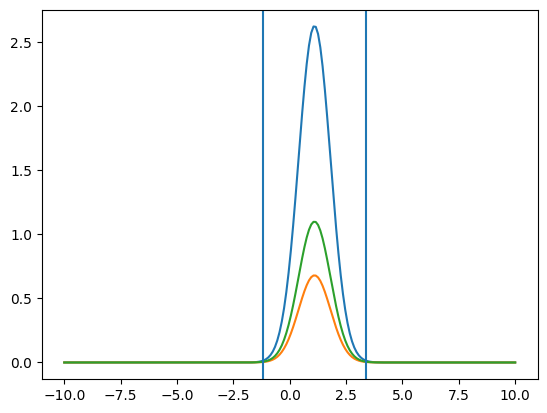

*Extracting Pieces for TH1*
Available Functions:
	Num_Xbins(TH1_) returns number of X bins for a TH1
	XEdges_1d(TH1_) returns edges of x bins for a TH1
	Center_Xbins(TH1_) returns center values for x bins for a TH1
	Values_1d(TH1_) returns the y values for a TH1
	Errors_1d(TH1_) returns the error values for TH1
	Errors2_1d(TH1_) returns the squared error values for TH1
Enjoy using TH1s

0.014000000000000012
You have access to information regarding all bin numbers, bin maxes, bin mins
Each goes _VAR_max_ min, bins, res, etc. 
All the names of them as well as edges.
Q2_Bin_Name[ 5 ]
W_Bin_Name[ 29 ]
MM1_Bin_Name[ 14 ]
MM2_Bin_Name[ 14 ]
theta_Bin_Name[ 10 ]
alpha_Bin_Name[ 10 ]
phi_Bin_Name[ 10 ]
_var_set_name_ [i]
_Xij_name_[i][j]
Also _mm1_name_ etc. for all Xijs
def Q2_Corr(Q2bin_) corrects the cross section for simulation so far as Q2 is concerned
def Xij_Bin_Name(var_, Xij_, Xijbin_,Wbin_=0):
def Xij_Plot_Name(var_, Xij_, Xijbin_,Wbin_=0):
def Xij_Var_Name(var_, Xij_):
$M(p',\pi^{+}

In [23]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot3
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions-uproot3.ipynb
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to the proper binning for the the various variables
%run /Users/cmc/analysis_phd/fitting/single_diff/Friend\ Binning\ Values.ipynb

In [24]:

exp_date = '10-01-2024'

emp_date = '10-01-2024'

exp_dir = "/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/"+exp_date
emp_dir = "/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/"+emp_date

rootfile_exp = exp_dir+"/"+"exp_e16_clas6_golden_"+exp_date+".root"
#rootfile_emp = emp_dir+"/"+"empty_exp_e16_clas6_golden_"+emp_date+".root"
rootfile_emp = emp_dir+"/"+"exp_e16_clas6_golden_"+emp_date+".root"


In [25]:
xfile = uproot3.open(rootfile_exp)
efile = uproot3.open(rootfile_emp)

In [26]:
xhist = [xfile['Golden Run Determination']['Normalized Integrated Faraday Cup Charge by Run E1-6'],xfile['Golden Run Determination']['Normalized Integrated Faraday Cup Charge Distribution E1-6']]
ehist = [efile['Golden Run Determination']['Normalized Integrated Faraday Cup Charge by Run E1-6'],efile['Golden Run Determination']['Normalized Integrated Faraday Cup Charge Distribution E1-6']]
                  

In [27]:
xvals = [[Center_Xbins(xhist[i]) for i in range(2)],[Center_Xbins(ehist[i]) for i in range(2)]]
yvals = [[Values_1d(xhist[i]) for i in range(2)],[Values_1d(ehist[i]) for i in range(2)]]         
   
         

In [57]:
empty_runs = [30745,30746, 30824, 30825, 30867, 30961, 30962, 31029, 31104, 31252, 31253, 31254, 31298, 31299, 31300, 31344, 31382, 31393]
filled_runs = [30540,30541,30542,30543,30563,30585,30549,30550,30551,30565,30568,30570,30571,30572,30579,30580,30582,30583,30584,30586,30587,30588,30589,30590,30591,30592,30593,30594,30595,30599,30600,30601,30602,30603,30604,30605,30606,30610,30612,30613,30614,30615,30616,30617,30618,30619,30620,30621,30622,30623,30624,30625,30626,30627,30628,30629,30631,30632,30633,30636,30638,30640,30678,30680,30681,30682,30684,30686,30687,30693,30694,30695,30698,30698,30699,30700,30701,30702,30703,30704,30705,30707,30708,30710,30711,30712,30713,30718,30719,30720,30722,30723,30724,30725,30726,30727,30728,30729,30730,30731,30732,30734,30735,30736,30737,30739,30740,30741,30742,30743,30745,30746,30747,30748,30749,30750,30753,30755,30756,30757,30758,30759,30760,30761,30762,30763,30766,30767,30768,30769,30773,30774,30775,30776,30777,30778,30779,30780,30781,30783,30784,30785,30786,30787,30789,30790,30791,30792,30794,30795,30799,30800,30801,30802,30803,30804,30805,30806,30807,30808,30809,30810,30811,30812,30813,30814,30815,30816,30817,30818,30819,30820,30821,30824,30825,30826,30827,30828,30829,30830,30831,30832,30833,30834,30835,30836,30837,30838,30839,30840,30841,30842,30843,30847,30848,30849,30850,30851,30852,30853,30854,30855,30856,30857,30858,30859,30860,30861,30862,30863,30864,30865,30866,30867,30909,30910,30912,30913,30914,30915,30916,30917,30918,30919,30920,30921,30922,30923,30924,30925,30926,30927,30928,30929,30930,30931,30932,30933,30934,30935,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970,30971,30972,30973,30974,30975,30976,30977,30978,30985,30990,30991,30992,30993,30994,30995,30996,30997,30998,30999,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,31011,31012,31013,31014,31015,31016,31017,31018,31019,31029,31030,31031,31032,31033,31034,31035,31036,31037,31038,31039,31040,31041,31042,31043,31044,31045,31046,31047,31048,31049,31050,31051,31052,31053,31056,31057,31058,31059,31060,31061,31062,31063,31064,31065,31066,31068,31069,31070,31071,31072,31073,31074,31075,31076,31079,31080,31081,31082,31083,31084,31085,31086,31087,31088,31089,31090,31091,31092,31093,31094,31096,31097,31098,31099,31100,31101,31102,31103,31104,31108,31109,31110,31111,31112,31113,31114,31115,31116,31117,31118,31119,31120,31121,31122,31123,31124,31125,31141,31142,31143,31144,31145,31146,31147,31158,31159,31160,31162,31163,31164,31165,31166,31167,31168,31169,31170,31171,31172,31173,31174,31175,31176,31177,31178,31179,31180,31181,31182,31183,31184,31185,31186,31188,31189,31190,31191,31192,31193,31194,31195,31196,31197,31199,31200,31201,31203,31206,31207,31208,31209,31210,31211,31212,31213,31215,31216,31217,31218,31219,31220,31221,31222,31223,31224,31225,31226,31227,31228,31229,31231,31232,31233,31234,31235,31236,31237,31238,31239,31240,31241,31242,31243,31244,31245,31246,31247,31248,31249,31250,31252,31253,31254,31255,31256,31257,31258,31259,31260,31261,31262,31263,31264,31265,31266,31267,31268,31269,31270,31275,31276,31277,31278,31279,31280,31281,31282,31283,31284,31285,31286,31287,31288,31289,31290,31291,31292,31293,31294,31295,31296,31298,31299,31300,31301,31302,31303,31304,31305,31306,31307,31308,31309,31310,31311,31312,31313,31314,31315,31316,31317,31320,31321,31322,31323,31324,31325,31326,31327,31328,31329,31330,31331,31332,31333,31334,31335,31336,31337,31338,31339,31340,31341,31342,31343,31344,31345,31346,31347,31348,31349,31350,31351,31352,31353,31354,31355,31356,31357,31358,31359,31360,31361,31362,31363,31364,31365,31366,31367,31368,31369,31370,31371,31372,31373,31374,31375,31376,31377,31378,31379,31381,31382,31392,31393,31394,31395,31396,31397,31399,31400,31401,31402,31403,31404,31405,31406,31407,31408,31409,31410,31411,31412,31413,31414,31415,31416,31417,31418,31419,31422,31423,31424,31425,31426,31431,31432,31433,31434,31435,31436,31437,31438,31439,31440,31441,31442,31443,31444,31445,31446,31447,31448,31449,31450,31451,31452,31453,31454,31455,31456,31457,31458,31459,31460,31461,31462,31463,31464,31465,31466,31467,31468,31469,31470,31471,31472,31473,31474,31475,31476,31477,31478,31479,31480,31481,31482,31483,31484]

def is_empty(run_):
    for i in range(len(empty_runs)):
        if run_ == empty_runs[i]:
            return True
    return False

def is_filled(run_):
    for i in range(len(filled_runs)):
        if run_ == filled_runs[i]:
            if is_empty(run_) == False:
                return True
    return False


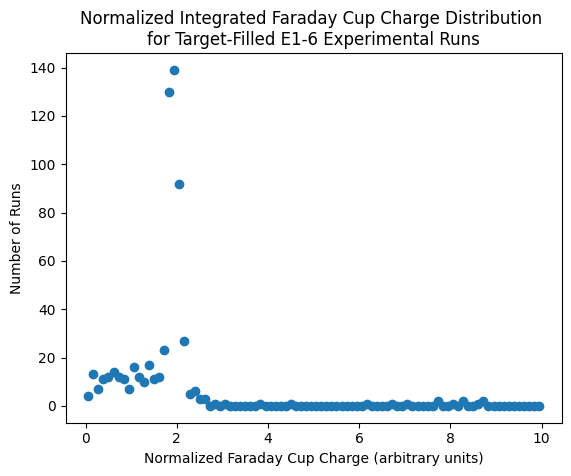

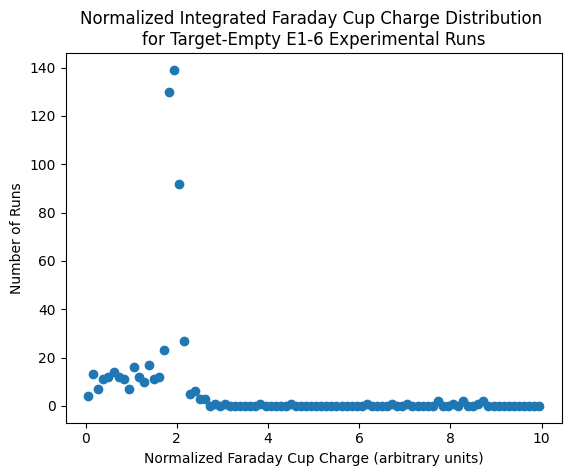

In [28]:
#Target Filled
fidx = 0
hidx = 1

plt.scatter(xvals[fidx][hidx],yvals[fidx][hidx])
plt.title("Normalized Integrated Faraday Cup Charge Distribution \nfor Target-Filled E1-6 Experimental Runs")
plt.xlabel("Normalized Faraday Cup Charge (arbitrary units)")
plt.ylabel("Number of Runs")
plt.show()


#Target Empty
fidx = 1
hidx = 1

plt.scatter(xvals[fidx][hidx],yvals[fidx][hidx])
plt.title("Normalized Integrated Faraday Cup Charge Distribution \nfor Target-Empty E1-6 Experimental Runs")
plt.xlabel("Normalized Faraday Cup Charge (arbitrary units)")
plt.ylabel("Number of Runs")
plt.show()

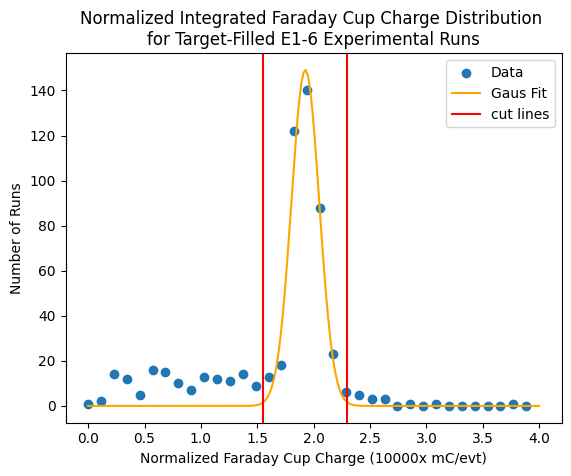

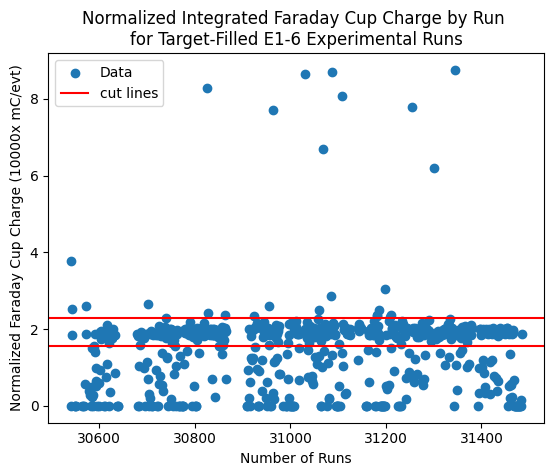

In [100]:
#Target Filled
fidx = 0
hidx = 0

b = 35
a = 4.0

tmp_x = [a*(i/b) for i in range(b)]
tmp_e = [a*(i/b) - (a*(2/b) - a*(1/b))/2.0 for i in range(b+1)]
tmp_y = np.zeros(b)

for i in range(len(yvals[fidx][hidx])):
    for j in range(b):
        if yvals[fidx][hidx][i] >= tmp_e[j] and yvals[fidx][hidx][i] < tmp_e[j+1] and yvals[fidx][hidx][i]>0.0 and is_filled(int(xvals[fidx][hidx][i])):
            tmp_y[j] += 1
    

plt.scatter(tmp_x,tmp_y,label='Data')

ini_par = [160,2.0,0.1]

cont_x = np.linspace(0.0,a,200)

pars00, pars_cov00 = op.curve_fit(Gaus,tmp_x,tmp_y,p0=ini_par,maxfev=0)
plt.plot(cont_x,Gaus(cont_x,*pars00),label='Gaus Fit',color='orange')
plt.axvline(x = pars00[1] - 3* pars00[2], color='r',label='cut lines')
plt.axvline(x = pars00[1] + 3* pars00[2], color='r')
plt.title("Normalized Integrated Faraday Cup Charge Distribution \nfor Target-Filled E1-6 Experimental Runs")
plt.xlabel("Normalized Faraday Cup Charge (10000x mC/evt)")
plt.ylabel("Number of Runs")
plt.legend()
plt.show()


x00 = []
y00 = []

for i in range(len(yvals[fidx][hidx])):
    if is_filled(int(xvals[fidx][hidx][i])):# and yvals[fidx][hidx][i]>0.0:
        x00.append(xvals[fidx][hidx][i])
        y00.append(yvals[fidx][hidx][i])

#plt.scatter(Remove_Zeros_X(xvals[fidx][hidx],yvals[fidx][hidx]),Remove_Zeros_Y(yvals[fidx][hidx]),label='Data')
plt.scatter(x00,y00,label='Data')
plt.axhline(y=pars00[1] - 3* pars00[2], color='r',label="cut lines")
plt.axhline(y=pars00[1] + 3* pars00[2], color='r')
plt.title("Normalized Integrated Faraday Cup Charge by Run \nfor Target-Filled E1-6 Experimental Runs")
plt.ylabel("Normalized Faraday Cup Charge (10000x mC/evt)")
plt.xlabel("Number of Runs")
plt.legend()
plt.show()


gold_exp_runs = []
bad_exp_runs = []
for i in range(len(xvals[fidx][hidx])):
    if yvals[fidx][hidx][i] >= pars00[1] - 3* pars00[2] and yvals[fidx][hidx][i] < pars00[1] + 3* pars00[2]:
        gold_exp_runs.append(xvals[fidx][hidx][i])
    else:
        bad_exp_runs.append(xvals[fidx][hidx][i])


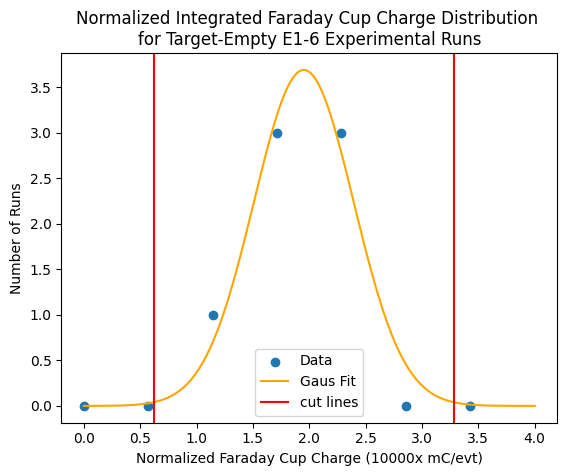

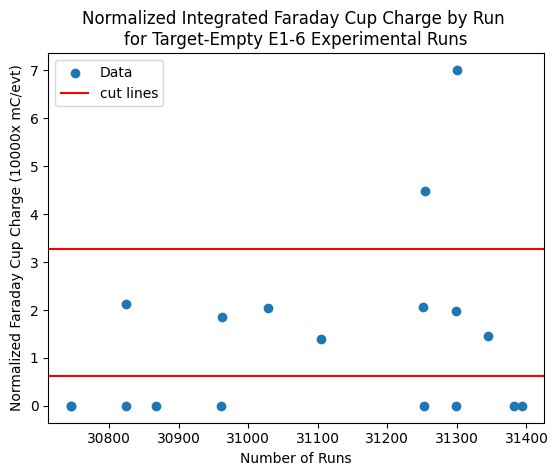

In [99]:
#Target Empty
fidx = 1
hidx = 0

b = 7
a = 4.0

tmp_x = [a*(i/b) for i in range(b)]
tmp_e = [a*(i/b) - (a*(2/b) - a*(1/b))/2.0 for i in range(b+1)]
tmp_y = np.zeros(b)

for i in range(len(yvals[fidx][hidx])):
    for j in range(b):
        if yvals[fidx][hidx][i] >= tmp_e[j] and yvals[fidx][hidx][i] < tmp_e[j+1] and yvals[fidx][hidx][i]>0.0 and is_empty(int(xvals[fidx][hidx][i])):
            tmp_y[j] += 1
    

plt.scatter(tmp_x,tmp_y,label='Data')

ini_par = [3,2.0,0.1]

cont_x = np.linspace(0.0,a,200)

pars10, pars_cov10 = op.curve_fit(Gaus,tmp_x,tmp_y,p0=ini_par,maxfev=0)
plt.plot(cont_x,Gaus(cont_x,*pars10),label='Gaus Fit',color='orange')
plt.axvline(x = pars10[1] - 3* pars10[2], color='r',label='cut lines')
plt.axvline(x = pars10[1] + 3* pars10[2], color='r')
plt.title("Normalized Integrated Faraday Cup Charge Distribution \nfor Target-Empty E1-6 Experimental Runs")
plt.xlabel("Normalized Faraday Cup Charge (10000x mC/evt)")
plt.ylabel("Number of Runs")
plt.legend()
plt.show()

x10 = []
y10 = []

for i in range(len(yvals[fidx][hidx])):
    if is_empty(int(xvals[fidx][hidx][i])):# and yvals[fidx][hidx][i]>0.0:
        x10.append(xvals[fidx][hidx][i])
        y10.append(yvals[fidx][hidx][i])

plt.scatter(x10,y10,label='Data')
#plt.scatter(Remove_Zeros_X(xvals[fidx][hidx],yvals[fidx][hidx]),Remove_Zeros_Y(yvals[fidx][hidx]),label='Data')
plt.axhline(y=pars10[1] - 3* pars10[2], color='r',label="cut lines")
plt.axhline(y=pars10[1] + 3* pars10[2], color='r')
plt.title("Normalized Integrated Faraday Cup Charge by Run \nfor Target-Empty E1-6 Experimental Runs")
plt.ylabel("Normalized Faraday Cup Charge (10000x mC/evt)")
plt.xlabel("Number of Runs")
plt.legend()
plt.show()


gold_emp_runs = []
bad_emp_runs = []
for i in range(len(xvals[fidx][hidx])):
    if yvals[fidx][hidx][i] >= pars10[1] - 3* pars10[2] and yvals[fidx][hidx][i] < pars10[1] + 3* pars10[2]:
        gold_emp_runs.append(xvals[fidx][hidx][i])
    else:
        bad_emp_runs.append(xvals[fidx][hidx][i])

In [101]:
print("Good Exp Filled Runs")
print("{",end='')
for i in range(len(gold_exp_runs)):
    if is_filled(gold_exp_runs[i]):
        print(int(gold_exp_runs[i]),end='')
        if i != len(gold_exp_runs)-1:
            print(",",end='')
print("};")

print("\nBad Exp Filled Runs")
print("{",end='')
for i in range(len(bad_exp_runs)):
    if is_filled(bad_exp_runs[i]):
        print(int(bad_exp_runs[i]),end='')
        if i != len(bad_exp_runs)-1:
            print(",",end='')
print("};")

print(len(gold_exp_runs))

Good Exp Filled Runs
{30542,30572,30589,30591,30602,30603,30604,30605,30606,30614,30615,30617,30618,30619,30621,30623,30624,30625,30626,30627,30628,30629,30631,30633,30678,30681,30686,30687,30694,30698,30700,30707,30708,30712,30713,30718,30723,30724,30726,30727,30729,30730,30735,30736,30737,30739,30740,30747,30748,30750,30753,30757,30758,30759,30762,30763,30778,30779,30780,30781,30783,30785,30786,30787,30789,30790,30791,30792,30795,30800,30804,30805,30806,30807,30808,30810,30811,30812,30813,30814,30815,30816,30817,30818,30819,30820,30821,30828,30829,30830,30831,30832,30833,30834,30836,30837,30838,30839,30840,30841,30842,30847,30848,30849,30851,30852,30853,30854,30855,30856,30858,30859,30860,30861,30862,30864,30866,30913,30917,30919,30922,30923,30926,30927,30928,30929,30931,30942,30943,30944,30945,30946,30947,30948,30950,30953,30954,30956,30957,30968,30969,30970,30971,30973,30974,30975,30977,30995,30997,30998,31001,31008,31009,31011,31012,31013,31014,31015,31016,31017,31031,31032,31033,

In [98]:
print("Good Exp Empty Runs")
print("{",end='')
for i in range(len(gold_emp_runs)):
    if is_empty(gold_emp_runs[i]):
        print(int(gold_emp_runs[i]),end='')
        if i != len(gold_emp_runs)-1:
            print(",",end='')
print("};")

print("\nBad Exp Empty Runs")
print("{",end='')
for i in range(len(bad_emp_runs)):
    if is_empty(bad_emp_runs[i]):
        print(int(bad_emp_runs[i]),end='')
        if i != len(bad_emp_runs)-1:
            print(",",end='')
print("};")

Good Exp Empty Runs
{30825,30962,31029,31104,31252,31299,31344,};

Bad Exp Empty Runs
{30745,30746,30824,30867,30961,31253,31254,31298,31300,31382,31393,};
